<a href="https://colab.research.google.com/github/theertha07/Predictive-Maintenace/blob/main/Predictive_Maintenance_for_Rotary_Equipments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing packages
import pandas as pd
import numpy as np

In [ ]:
# Importing the dataset
train = pd.read_csv('/content/drive/MyDrive/Datasets/NB.csv')
train['Fault'] = 0

test = pd.read_csv('/content/drive/MyDrive/Datasets/IR-7.csv')
test['Fault'] = 1

**Dataset containing Drive End(DE) and Fan End(FE) accelerations of rotary equipment**

In [ ]:
dataset = train.append(test)
dataset

<ipython-input-4-c1ca032ff59f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = train.append(test)


,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


In [ ]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

**Splitting into Train and Test data (Train size = 80%, Test size = 20%) -**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_train

104802    0
7         1
57714     1
15253     0
78974     0
         ..
55808     1
117952    0
52530     1
43567     0
78185     1
Name: Fault, Length: 193848, dtype: int64

#Comparing Random Forest and Decision Tree classifier -

#Using Random Forest Classifier -

---



In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

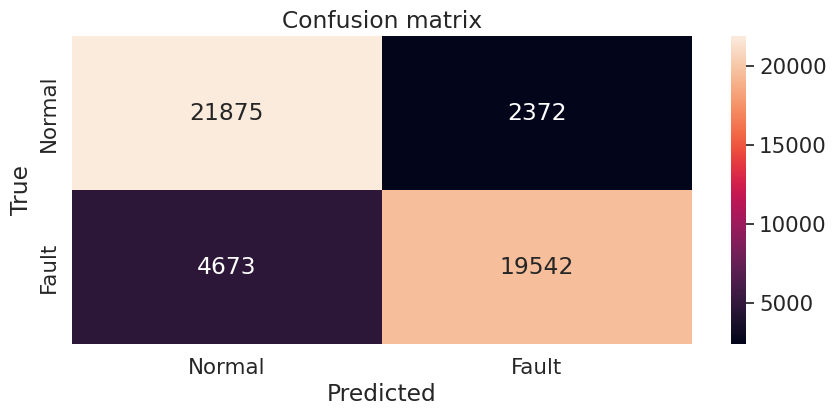

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Fault']  
columns = ['Normal','Fault']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Fault'])
print(cr)

              precision    recall  f1-score   support

      Normal       0.82      0.90      0.86     24247
       Fault       0.89      0.81      0.85     24215

    accuracy                           0.85     48462
   macro avg       0.86      0.85      0.85     48462
weighted avg       0.86      0.85      0.85     48462



**Accuracy of Random Forest Classifier is found to be 85.46% -**

In [ ]:
classifier.score(X_test, y_test)

0.8546283686187116

#Using Decision Tree Classifier -

---



In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

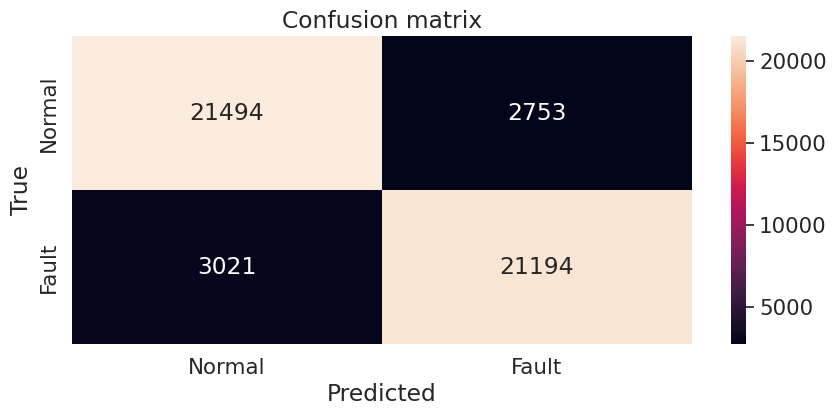

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Fault']  
columns = ['Normal','Fault']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Fault'])
print(cr)

              precision    recall  f1-score   support

      Normal       0.88      0.89      0.88     24247
       Fault       0.89      0.88      0.88     24215

    accuracy                           0.88     48462
   macro avg       0.88      0.88      0.88     48462
weighted avg       0.88      0.88      0.88     48462



**Decision Tree Classifier has a higher accuracy of 88.1% -**

In [ ]:
classifier.score(X_test, y_test)

0.8808551029672733

#Prediction results -

---



In [ ]:
de=input("Enter Drive End (DE) acceleration: ") #de=0.064254
fe=input("Enter Fan End (FE) acceleration: ") #fe=0.038625
pred=classifier.predict([[de,fe]])
if(pred==0):
  print("Fault")
else:
  print("Normal")  

Enter Drive End (DE) acceleration: 0.064254
Enter Fan End (FE) acceleration: 0.038625
Fault


In [ ]:
de=input("Enter Drive End (DE) acceleration: ") #de=0.185501
fe=input("Enter Fan End (FE) acceleration: ") #fe=0.136011
pred=classifier.predict([[de,fe]])
if(pred==0):
  print("Fault")
else:
  print("Normal")  #de=-0.004381, fe=0.127382

Enter Drive End (DE) acceleration: 0.185501
Enter Fan End (FE) acceleration: 0.136011
Normal


#Classification of vibration signals 

---



In [ ]:
import glob
from scipy.io import loadmat
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy
import re
import os
import pandas as pd
import pywt
from scipy.fftpack import fft
from warnings import warn
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Function for FFT

def apply_fft(x, fs, num_samples):
    f = np.linspace(0.0, (fs/2.0), num_samples//2)
    freq_values = fft(x)
    freq_values = 2.0/num_samples * np.abs(freq_values[0:num_samples//2])
    return f, freq_values

In [ ]:
# @@@ Function to create dataset from raw vibration signals @@@
# The function processes .mat vibration data files and do segmentation of vibration signals according to 
# desired length of the input segment "num_samples".
# The function returns segmented vibration signlas "segmented_data" along with their classes " Class_" . 

def make_dataset(data_src, num_samples, class_):
    
    req_key = "_DE_time" # key to slect Drive End (DE) vibration data from .mat files
    pattern = re.compile(req_key)
    files = glob.glob(data_src)
    files = np.sort(files)
    data = loadmat(files[0])
    keysList = [key for key in data]
    for key in keysList:
        if pattern.search(key):
            my_key = key
    drive_end_data = data[my_key]
    drive_end_data = drive_end_data.reshape(-1)
    num_segments = np.floor(len(drive_end_data)/num_samples)
    slices = np.split(drive_end_data[0:int(num_segments*num_samples)], num_samples)
    slices = np.array(slices).reshape(int(num_segments), num_samples)
    segmented_data = slices
    files = files[1:]
    for file in files:
        data = loadmat(file)
        keysList = [key for key in data]
        for key in keysList:
            if pattern.search(key):
                my_key = key
        drive_end_data = data[my_key]
        drive_end_data = drive_end_data.reshape(-1)
        num_segments = np.floor(len(drive_end_data)/num_samples)
        slices = np.split(drive_end_data[0:int(num_segments*num_samples)], num_samples)
        slices = np.array(slices).reshape(int(num_segments), num_samples)
        segmented_data = np.concatenate( (segmented_data, slices) , axis=0, out=None)
    
    segmented_data = np.unique(segmented_data, axis= 0) # remove duplicates
    np.random.shuffle( segmented_data) # suffule the data
    Class_ = np.ones(len(segmented_data))*class_
    
    return segmented_data, Class_

In [ ]:
num_samples = 1200 # Set required length of input vibration segment "number of data points"
###########################################
fs = 12000; # Sampling freq.

**Datasets containing Drive End vibration signals taken from CWRU dataset-** 
**12k = sampling rate of vibration signals, IRFault = Inner Race faults,** 
**BallFault = Ball faults,**
**ORFault = Outer Race faults,**
**0.014/0.021/0.007= fault diameter**  

In [ ]:
data_path = ("/content/drive/MyDrive/Datasets_CWRU/") # path were the folders contain vibration signals are located.

cls_1 = '12K_DE_Normal.mat/*'; cls_2 = '12k_DE_IRFault_0.007/*'; cls_3 = '12k_DE_IRFault_0.014/*'; 
cls_4 = '12k_DE_IRFault_0.021/*'; cls_5 = '12k_DE_BallFault_0.007/*'
cls_6 = '12k_DE_BallFault_0.014/*'; cls_7 = '12k_DE_BallFault_0.021/*'
cls_8 = '12k_DE_ORFault_0.007/*'; cls_9 = '12k_DE_ORFault_0.014/*'; cls_10 ='12k_DE_ORFault_0.021/*'

norm, y_norm,  = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_Normal.mat", num_samples, 1)
defc1, y_defc1 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_IRFault_0.007.mat", num_samples, 2)
defc2, y_defc2 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_IRFault_0.014.mat", num_samples, 3)
defc3, y_defc3 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_IRFault_0.021.mat", num_samples, 4)
defc4, y_defc4 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_BallFault_0.007.mat", num_samples, 5)
defc5, y_defc5 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_BallFault_0.014.mat", num_samples, 6)
defc6, y_defc6 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_BallFault_0.021.mat", num_samples, 7)
defc7, y_defc7 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_ORFault_0.007.mat", num_samples, 8)
defc8, y_defc8 = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_ORFault_0.014.mat", num_samples, 9)
defc9, y_defc9  = make_dataset("/content/drive/MyDrive/Datasets_CWRU/12K_DE_ORFault_0.021.mat", num_samples, 10)

In [ ]:
defc9

array([[-0.21075958, -0.02355309,  0.2233483 , ..., -0.34923553,
         0.61035   ,  0.27613972],
       [-0.12466896, -0.2399979 ,  0.01868004, ...,  0.21319611,
         0.0499488 ,  0.02274092],
       [-0.18273952, -0.15796816, -0.01827395, ..., -0.60953782,
         0.51288892,  0.52832026],
       ...,
       [-0.09177585,  0.3000989 ,  0.45563054, ..., -0.43207745,
         1.15653812, -0.1932978 ],
       [ 0.15634381, -0.96608293,  0.3403016 , ..., -0.04426357,
        -0.12872984, -0.19248563],
       [-0.00690349,  0.36710339,  0.18436387, ..., -0.03126876,
         0.33624072,  0.19857695]])

**Plotting vibration signals for normal condition -**

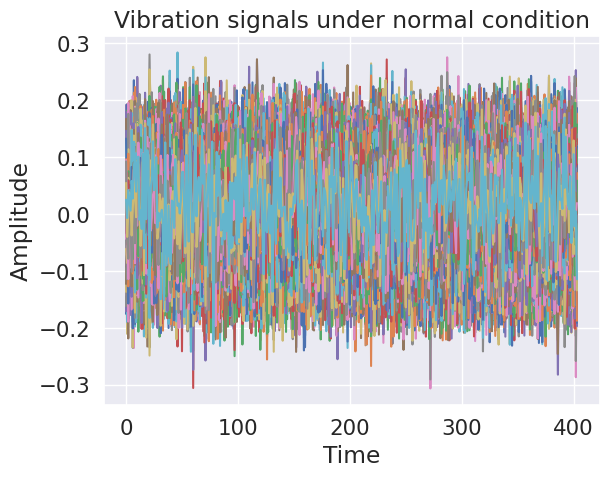

In [ ]:
plt.plot(norm)
plt.title('Vibration signals under normal condition')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

**Plotting vibration signals for fault class 1 -**

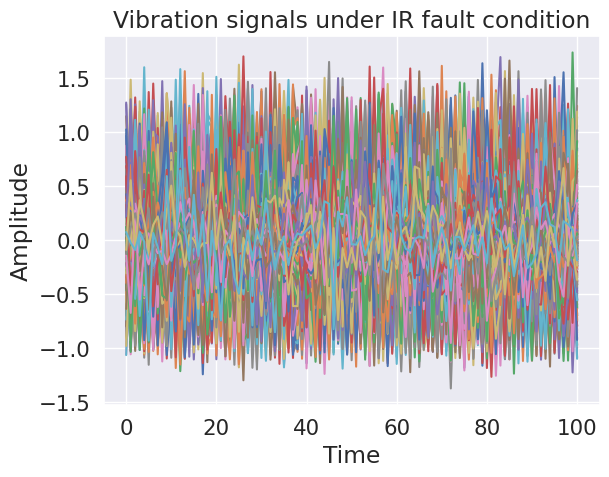

In [ ]:
plt.plot(defc1)
plt.title('Vibration signals under IR fault condition')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

**Plotting vibration signals for fault class 9 -**

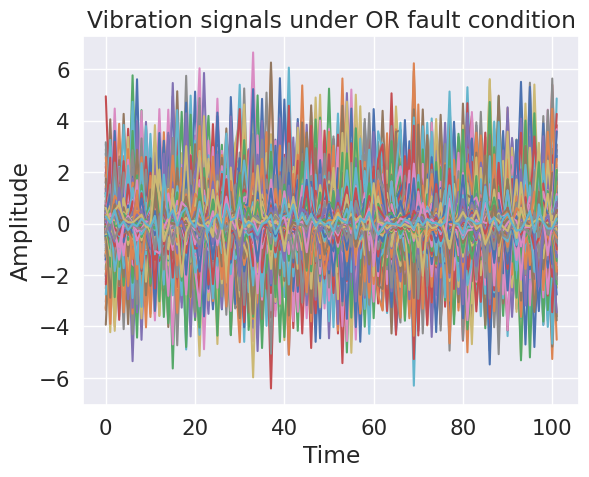

In [ ]:
plt.plot(defc9)
plt.title('Vibration signals under OR fault condition')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

**After applying FFT -**

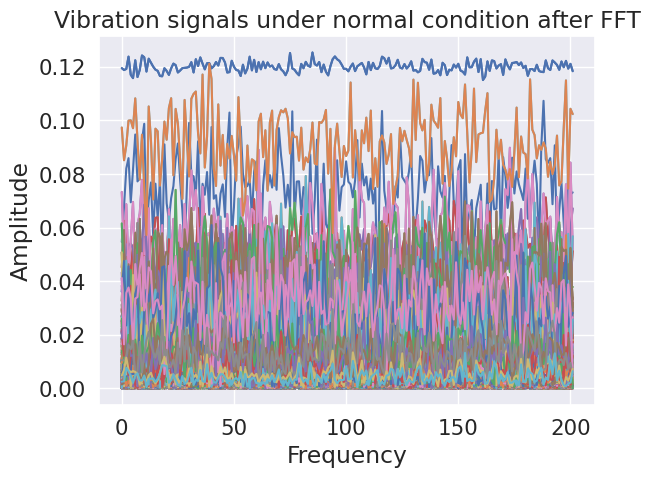

In [ ]:
x,y=apply_fft(norm,fs,len(norm))
plt.plot(y)
plt.title('Vibration signals under normal condition after FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

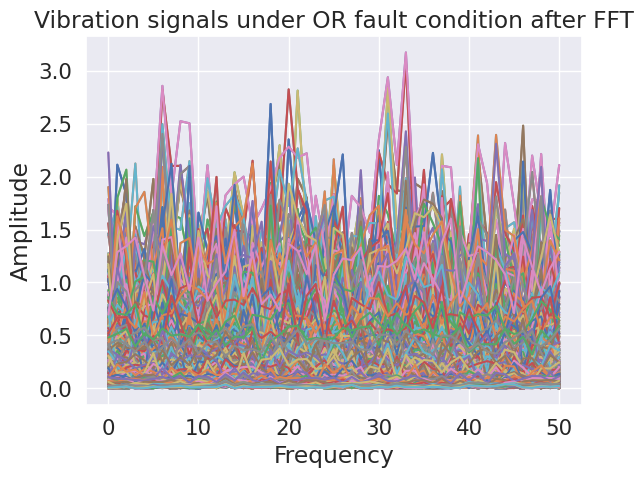

In [ ]:
x,y=apply_fft(defc9,fs,len(defc9))
plt.plot(y)
plt.title('Vibration signals under OR fault condition after FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
X = np.concatenate( (norm, defc1, defc2, defc3, defc4, defc5, defc6, defc7, defc8,  defc9 ) , axis=0, out=None)
Y = np.concatenate( (y_norm, y_defc1, y_defc2, y_defc3, y_defc4, y_defc5, 
                          y_defc6, y_defc7, y_defc8, y_defc9  ), axis=0, out=None)

In [ ]:
#####INPUTS / Parameters #############
wavelet_function = "db4"
num_levels = 3 # k parameter
m = 1 # m parameter

# Wavelet Packet Transform and feature extraction:

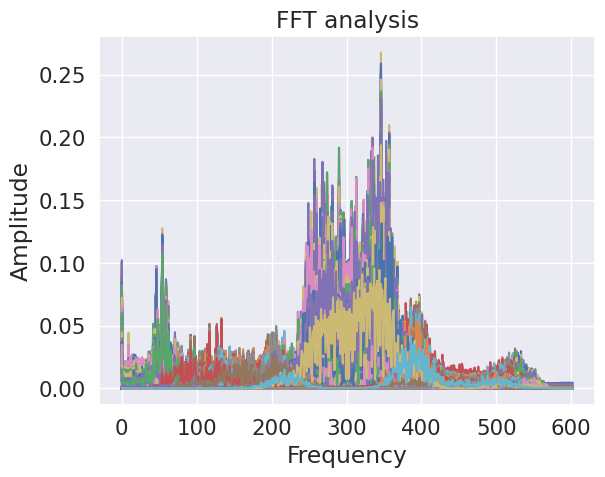

In [ ]:
num_features = 2**num_levels
features = np.repeat(np.nan, len(X)*m*num_features).reshape(len(X),m*num_features)

for i in range(len(X)):    
    wp = pywt.WaveletPacket(X[i], wavelet = wavelet_function, maxlevel = num_levels) # Wavelet packet transformation
    packet_names = [node.path for node in wp.get_level(num_levels, "natural")]
    for j in range(num_features):
        new_wp = pywt.WaveletPacket(data = None, wavelet = wavelet_function, maxlevel = num_levels)
        new_wp[packet_names[j]] = wp[packet_names[j]].data
        reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
        f, c = apply_fft(reconstructed_signal, fs, len(reconstructed_signal))
        z = abs(c)
        plt.title('FFT analysis')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.plot(z)
        
        # Find  m  highest amplitudes of the spectrum and their corresponding frequencies:
        maximal_idx = np.argpartition(z, -m)[-m:]
        high_amp = z[maximal_idx]
        high_freq = f[maximal_idx]
        feature = high_amp*high_freq
        
        l = 0
        for f in feature:
            features[i,j*m+l] = f
            l = l+1

**Plotting the reconstructed signal -**

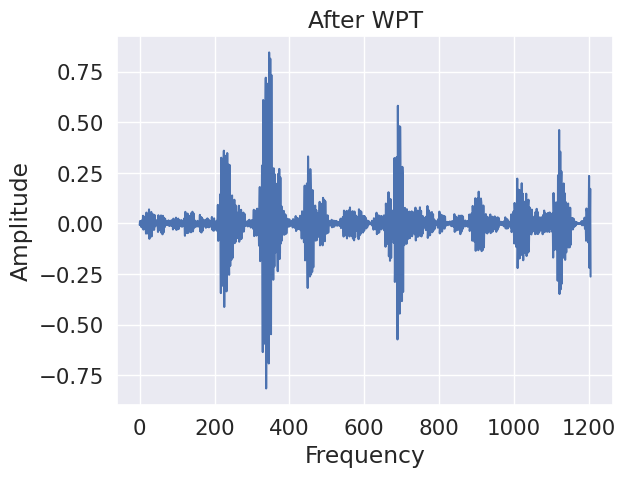

In [ ]:
plt.title('After WPT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(reconstructed_signal)
plt.show()

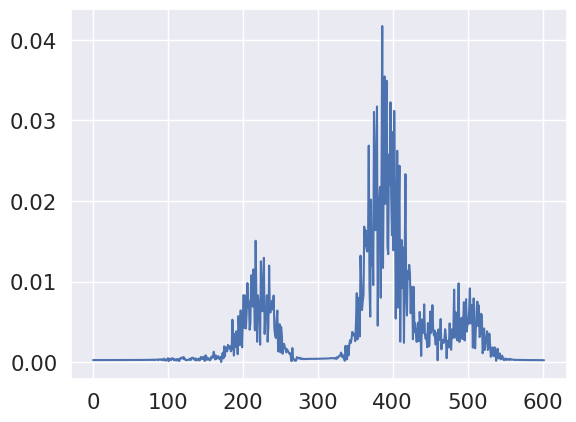

In [ ]:
plt.plot(c)

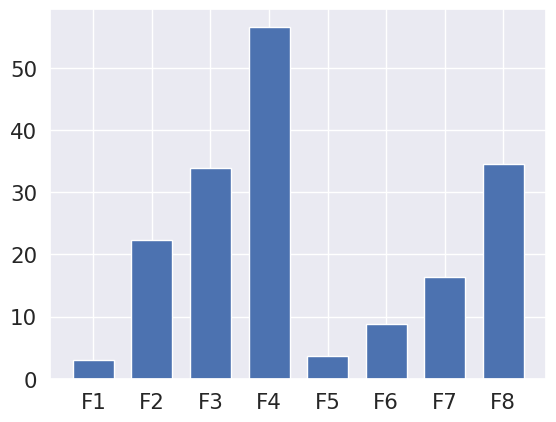

In [ ]:
# Par-plot of the extracted features:
plt.rc('font', size=20)
X_Labels = ['F1','F2','F3','F4','F5','F6','F7','F8']
plt.bar(X_Labels, features[0], 0.7)#,  size=15)
plt.show()

#Using Decision Tree Classifier - 

---



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
labels = pd.Categorical(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, 
                                            stratify = labels, random_state = 42)

In [ ]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(X_test)

In [ ]:
clf_RF = DecisionTreeClassifier(criterion='gini', max_features = 1, min_samples_leaf=1, min_samples_split=2, 
                                max_depth= 20)
clf_RF.fit(train_data_scaled, y_train)

DecisionTreeClassifier(max_depth=20, max_features=1)

No. of Samples = 1200 /  k = 3 /  m = 1
ROC AUC = 0.901
F1 Score = 0.844106463878327
Accuracy = 84.411 %


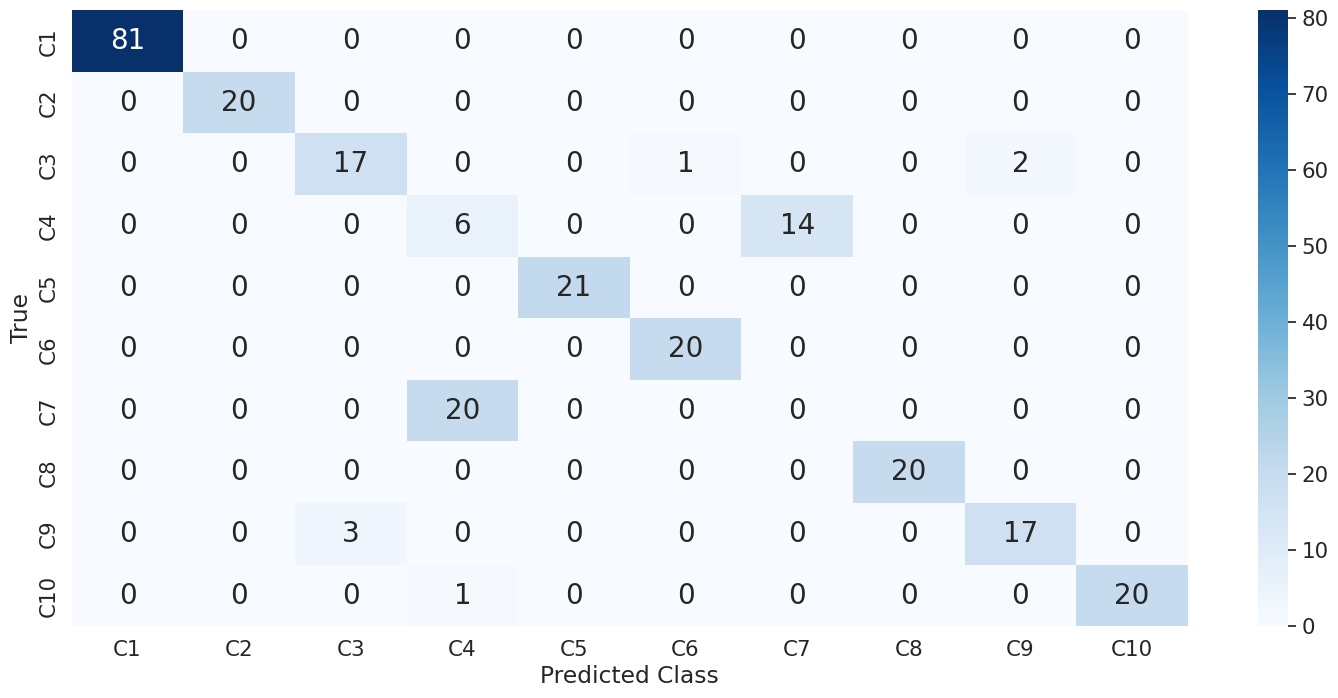

In [ ]:
test_predictions = clf_RF.predict(test_data_scaled)
test_confu_matrix = confusion_matrix(y_test, test_predictions)
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = metrics.accuracy_score(y_test, test_predictions)
F1_score = metrics.f1_score(y_test, test_predictions, average='micro')
probs = clf_RF.predict_proba(test_data_scaled)
lr_auc = roc_auc_score(y_test, probs, multi_class='ovr')
print("No. of Samples =", num_samples, "/  k =", num_levels, "/  m =", m, )
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, test_predictions, target_names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
print(cr)

              precision    recall  f1-score   support

          C1       1.00      1.00      1.00        81
          C2       1.00      1.00      1.00        20
          C3       0.85      0.85      0.85        20
          C4       0.22      0.30      0.26        20
          C5       1.00      1.00      1.00        21
          C6       0.95      1.00      0.98        20
          C7       0.00      0.00      0.00        20
          C8       1.00      1.00      1.00        20
          C9       0.89      0.85      0.87        20
         C10       1.00      0.95      0.98        21

    accuracy                           0.84       263
   macro avg       0.79      0.80      0.79       263
weighted avg       0.84      0.84      0.84       263



#Using Random Forest Classifier -

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_RF = RandomForestClassifier(criterion='gini', max_features = 1, min_samples_leaf=1, min_samples_split=2, 
                                max_depth= 20, n_estimators= 300)
clf_RF.fit(train_data_scaled, y_train)

RandomForestClassifier(max_depth=20, max_features=1, n_estimators=300)

No. of Samples = 1200 /  k = 3 /  m = 1
ROC AUC = 0.984
F1 Score = 0.8707224334600759
Accuracy = 87.072 %


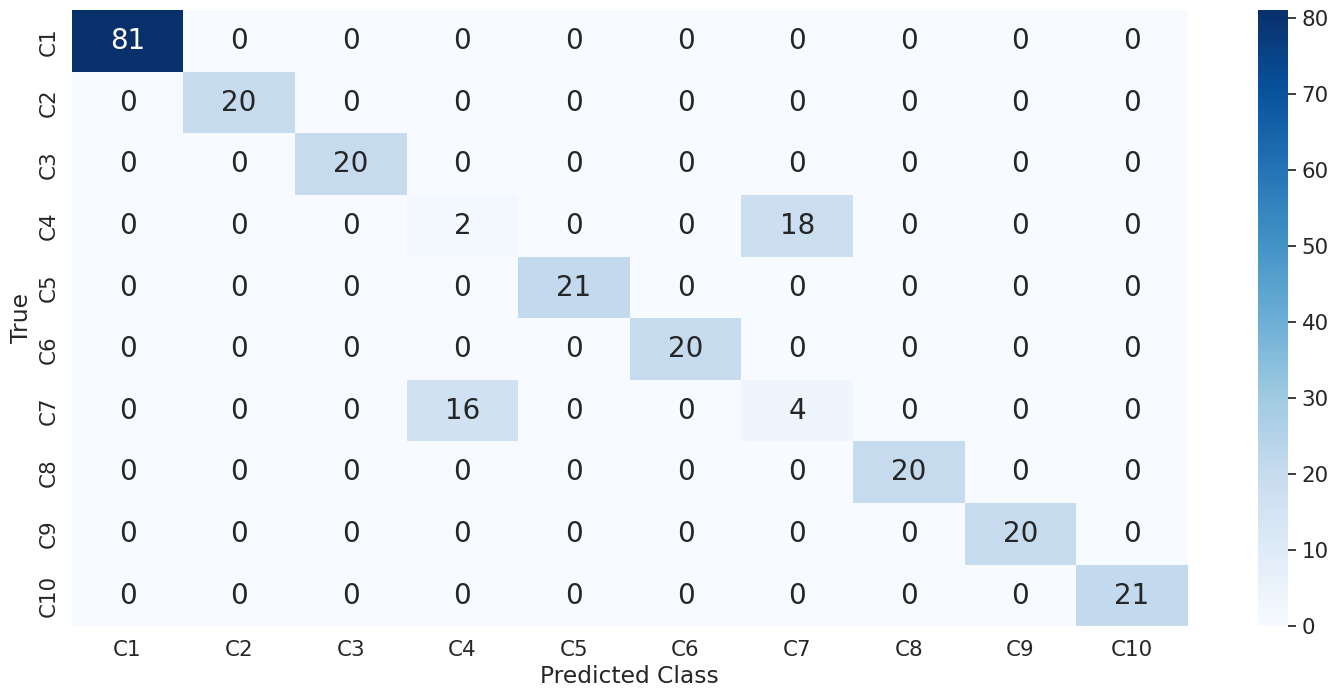

In [ ]:
test_predictions = clf_RF.predict(test_data_scaled)
test_confu_matrix = confusion_matrix(y_test, test_predictions)
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = metrics.accuracy_score(y_test, test_predictions)
F1_score = metrics.f1_score(y_test, test_predictions, average='micro')
probs = clf_RF.predict_proba(test_data_scaled)
lr_auc = roc_auc_score(y_test, probs, multi_class='ovr')
print("No. of Samples =", num_samples, "/  k =", num_levels, "/  m =", m, )
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, test_predictions, target_names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
print(cr)

              precision    recall  f1-score   support

          C1       1.00      1.00      1.00        81
          C2       1.00      1.00      1.00        20
          C3       1.00      1.00      1.00        20
          C4       0.11      0.10      0.11        20
          C5       1.00      1.00      1.00        21
          C6       1.00      1.00      1.00        20
          C7       0.18      0.20      0.19        20
          C8       1.00      1.00      1.00        20
          C9       1.00      1.00      1.00        20
         C10       1.00      1.00      1.00        21

    accuracy                           0.87       263
   macro avg       0.83      0.83      0.83       263
weighted avg       0.87      0.87      0.87       263



**Accuracy of Random Forest Classifier is found to be more than Decision Tree in classification of signals into multiple classes**

#Prediction Results

In [ ]:
defc5_scaled = scaler.fit_transform(defc5)
clf_RF.fit(defc5_scaled, y_defc5)
pred=clf_RF.predict(defc5_scaled)

In [ ]:
if(pred[0]==1):
  print("Healthy signal")
elif(pred[0]==2):
  print("IR fault with 0.007 fault diameter")
elif(pred[0]==3):
  print("IR fault with 0.014 fault diameter") 
elif(pred[0]==4):
  print("IR fault with 0.021 fault diameter") 
elif(pred[0]==5):
  print("Ball fault with 0.007 fault diameter")
elif(pred[0]==6):
  print("Ball fault with 0.014 fault diameter")
elif(pred[0]==7):
  print("Ball fault with 0.021 fault diameter") 
elif(pred[0]==8):
  print("OR fault with 0.007 fault diameter")
elif(pred[0]==9):
  print("OR fault with 0.014 fault diameter")
elif(pred[0]==10):
  print("OR fault with 0.021 fault diameter")   

Ball fault with 0.014 fault diameter
